In [1]:
# 데이터 구성 패키지
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib as mpl

import matplotlib.pyplot as plt

# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline


In [2]:
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = mpl.font_manager.FontProperties(fname = font_location).get_name()
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font',family= font_name)

In [3]:
df_2 = pd.read_pickle('/home/pirl/Downloads/df_june.pkl')
df_2 = df_2[["모름","KF규격"]]
df_2.shape

(55255, 2)

In [4]:
df_clean = pd.read_pickle('/home/pirl/Downloads/미세먼지/pkl/POS.pkl')
df_clean.shape

(55232, 19)

In [5]:
df_age = pd.read_excel("/home/pirl/Downloads/인천시_연령.xlsx")
df_age.head(3)

,행정구역,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,인천광역시 중구,41.0,41.1,41.1,41.1,41.2,41.2,41.2,41.2,41.3,...,41.6,41.6,41.5,41.5,41.4,41.4,41.4,41.3,41.3,41.3
1,인천광역시 동구,43.8,43.8,43.9,43.9,44.0,44.0,44.1,44.1,44.2,...,45.2,45.2,45.3,45.4,45.5,45.6,45.6,45.7,45.8,45.8
2,인천광역시 미추홀구,41.7,41.8,41.8,41.9,41.9,41.9,42.0,42.0,42.1,...,42.6,42.7,42.7,42.8,42.9,42.9,43.0,43.0,43.1,43.1


In [6]:
df_pay = pd.read_excel("/home/pirl/Downloads/소득.xlsx")
df_pay.head()

,지역,평균소득
0,서울특별시 종로구,1406168
1,서울특별시 중구,1421575
2,서울특별시 용산구,1456280
3,서울특별시 성동구,1416037
4,서울특별시 광진구,1337792


In [7]:
df_age = pd.melt(df_age, id_vars=['행정구역'], var_name='시점', value_name='연령')

In [8]:
df_2 = pd.merge(df_2, df_clean, left_index=True, right_index=True)
df_2.drop(['Manufacturer','Sales Amt', 'Unit Price'], axis=1, inplace=True)

In [9]:
df_2.shape

(55232, 18)

In [10]:
df_1 = pd.read_excel("/home/pirl/Downloads/인구수_피봇.xlsx")
df_1.head(3)

,지역,구군,시점,인구
0,서울특별시,소계,2016. 12,9930616
1,서울특별시,소계,2017. 01,9930478
2,서울특별시,소계,2017. 02,9931412


In [11]:
df_1.shape

(8184, 4)

In [12]:
df_eco = pd.read_excel("/home/pirl/Downloads/킹기지수.xlsx")
df_eco.head(3)

,시점,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100)
0,2016. 12,106.4,105.1,104.7
1,2017. 01,106.8,105.7,105.1
2,2017. 02,107.3,105.9,105.4


In [13]:
df_gdp = pd.read_excel("/home/pirl/Downloads/gdp.xlsx")
df_gdp.head(3)

,분기,gdp
0,2017Q1,384682.7
1,2017Q2,387115.3
2,2017Q3,392515.9


In [14]:
df_1 = pd.merge(df_1,df_eco, on='시점',how = 'left')


In [15]:
df_1["시점"] = pd.to_datetime(df_1['시점'])
df_1['분기'] = pd.PeriodIndex(df_1['시점'], freq='Q')
df_1['분기'] = df_1['분기'].astype('str')
df_1 = pd.merge(df_1,df_gdp, on='분기',how = 'left')

In [16]:
df_1.구군 = df_1.구군.str.strip() 
df_2.구군 = df_2.구군.str.strip() 

In [17]:
df_1.시점 = df_1.시점.astype("str")
df_2["시점"] = df_2["Calendar Day일 2"].astype("str")

In [18]:
df_2["시점"] = df_2["시점"].str[:7]
df_1["시점"] = df_1["시점"].str[:7]
df_1["구군"] = df_1["구군"].replace('남구','미추홀구')



In [19]:
L= ['성남시 분당구', '고양시 덕양구', '부천시 원미구', '수원시 권선구', '용인시 기흥구', '안산시 상록구', '고양시 일산서구',
    '안산시 단원구', '안양시 동안구', '용인시 수지구', '고양시 일산동구', '성남시 중원구', '수원시 장안구', '수원시 영통구',
    '성남시 수정구', '안양시 만안구', '수원시 팔달구', '부천시 오정구', '용인시 처인구', '부천시 소사구','남구','여주군']
k = ['분당구','덕양구','부천시','권선구','기흥구','상록구', '일산서구','단원구','동안구','수지구','일산동구','중원구','장안구','영통구','수정구','만안구',
     '팔달구','부천시','처인구','부천시','미추홀구','여주시']
for i,j in zip(L,k):
    df_2["구군"] = df_2["구군"].replace(i,j)

In [20]:
df_raw = pd.merge(df_2,df_1, on=['지역','구군','시점'],how = 'left')
df_raw.shape

(55232, 25)

In [21]:
df_raw['지역'] = df_raw['지역'].str[:2] 
df_raw.isnull().sum()

모름                     0
KF규격                   0
CUSTOMER NAME          0
Calendar Day일 2        0
POS Category Code      0
UPC                    0
품목명                    0
Sales (Bag)            0
Sales SU             376
박스입수                   0
구분                     0
유통사                    0
SUB-CTG                0
수량(CS)                 0
금액                     0
가격                     0
지역                     0
구군                     0
시점                     0
인구                     0
선행종합지수(2015=100)       0
동행종합지수(2015=100)       0
후행종합지수(2015=100)       0
분기                     0
gdp                    0
dtype: int64

In [22]:
df_raw[df_raw['인구'].isnull()]['구군'].value_counts()

Series([], Name: 구군, dtype: int64)

In [23]:
df_age.head()

,행정구역,시점,연령
0,인천광역시 중구,2017-01,41.0
1,인천광역시 동구,2017-01,43.8
2,인천광역시 미추홀구,2017-01,41.7
3,인천광역시 연수구,2017-01,37.9
4,인천광역시 남동구,2017-01,39.3


In [24]:
df_age["지역"] = df_age['행정구역'].map(lambda x : x.split()[0])
df_age["구군"] = df_age['행정구역'].map(lambda x : x.split()[-1])

In [25]:
df_pay["구군"] = df_pay['지역'].map(lambda x : x.split()[-1])
df_pay["지역"] = df_pay['지역'].map(lambda x : x.split()[0])

In [26]:
df_age.drop(['행정구역'],axis=1,inplace=True)


In [27]:
df_age["지역"] = df_age["지역"].str[:2]
df_pay["지역"] = df_pay["지역"].str[:2]

In [28]:
df_pay.head()

,지역,평균소득,구군
0,서울,1406168,종로구
1,서울,1421575,중구
2,서울,1456280,용산구
3,서울,1416037,성동구
4,서울,1337792,광진구


In [29]:
df_raw.shape

(55232, 25)

In [30]:
df_age.head()

,시점,연령,지역,구군
0,2017-01,41.0,인천,중구
1,2017-01,43.8,인천,동구
2,2017-01,41.7,인천,미추홀구
3,2017-01,37.9,인천,연수구
4,2017-01,39.3,인천,남동구


In [31]:
df = pd.merge(df_raw, df_age, on = ['지역','시점','구군'], how='left')

In [32]:
df.shape

(55232, 26)

In [33]:
df[df['연령'].isnull()]['구군'].value_counts()

Series([], Name: 구군, dtype: int64)

In [34]:
df.shape

(55232, 26)

In [35]:
L= ['분당구', '덕양구', '권선구', '기흥구', '상록구', '일산서구', '단원구', '동안구', '수지구', '일산동구', '중원구', '장안구', '영통구', '수정구', '만안구', '팔달구', '처인구']
k = ['성남시','고양시','수원시','용인시','안산시','고양시','안산시','안양시','용인시','고양시','성남시','수원시','수원시','성남시','안양시','수원시','용인시']


In [36]:
df["버릴거"] =  df['구군']

In [37]:
for i,j in zip(L, k):
    df["버릴거"] = df["버릴거"].replace(i,j)

In [38]:
df= pd.merge(df, df_pay, left_on = ['지역','버릴거'], right_on=['지역','구군'], how='left')

In [39]:
df.head()

,모름,KF규격,CUSTOMER NAME,Calendar Day일 2,POS Category Code,UPC,품목명,Sales (Bag),Sales SU,박스입수,...,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),분기,gdp,연령,버릴거,평균소득,구군_y
0,CNX,0,(주)지에스리테일 본부,2017-01-01,MP,8.800000e+12,CNX 황사마스크 대형1P,27,27.0,50,...,472141,106.8,105.7,105.1,2017Q1,384682.7,39.2,평택시,1281433,평택시
1,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,28,0.0,50,...,472141,106.8,105.7,105.1,2017Q1,384682.7,39.2,평택시,1281433,평택시
2,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,20,0.0,50,...,472141,106.8,105.7,105.1,2017Q1,384682.7,39.2,평택시,1281433,평택시
3,CNX,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,CNX 황사마스크 성인용3P,1,1.0,50,...,154381,106.8,105.7,105.1,2017Q1,384682.7,43.4,포천시,1290713,포천시
4,CNX,KF94,(주)지에스리테일 본부,2017-01-01,MP,8.800000e+12,CNX KF94 방역용 마스크 1입,2,2.0,50,...,154381,106.8,105.7,105.1,2017Q1,384682.7,43.4,포천시,1290713,포천시


In [40]:
df.shape

(55232, 29)

In [41]:
df.drop(['구군_y','버릴거'], axis=1, inplace=True )

In [42]:
df.isnull().sum()

모름                     0
KF규격                   0
CUSTOMER NAME          0
Calendar Day일 2        0
POS Category Code      0
UPC                    0
품목명                    0
Sales (Bag)            0
Sales SU             376
박스입수                   0
구분                     0
유통사                    0
SUB-CTG                0
수량(CS)                 0
금액                     0
가격                     0
지역                     0
구군_x                   0
시점                     0
인구                     0
선행종합지수(2015=100)       0
동행종합지수(2015=100)       0
후행종합지수(2015=100)       0
분기                     0
gdp                    0
연령                     0
평균소득                   0
dtype: int64

In [43]:
df = df.rename(columns={"구군_x": "구군"})

In [44]:
df.isnull().sum()

모름                     0
KF규격                   0
CUSTOMER NAME          0
Calendar Day일 2        0
POS Category Code      0
UPC                    0
품목명                    0
Sales (Bag)            0
Sales SU             376
박스입수                   0
구분                     0
유통사                    0
SUB-CTG                0
수량(CS)                 0
금액                     0
가격                     0
지역                     0
구군                     0
시점                     0
인구                     0
선행종합지수(2015=100)       0
동행종합지수(2015=100)       0
후행종합지수(2015=100)       0
분기                     0
gdp                    0
연령                     0
평균소득                   0
dtype: int64

In [45]:
df_dust = pd.read_pickle("/home/pirl/Downloads/dust(clean).pkl")



In [46]:
df_dust.head(3)
df_dust = df_dust.rename(columns={"date": 'Calendar Day일 2'})
df_dust[df_dust.duplicated()]
df_dust[(df_dust['Calendar Day일 2']=='2018-10-01')&(df_dust['지역']=='인천')&(df_dust['구군']=='서구')]
df_dust[df_dust[['지역', '구군', 'Calendar Day일 2']].duplicated()]
df_dust.지역.value_counts()

경기    23761
서울    18275
인천     7310
부산     1488
충남     1395
경남     1302
경북     1209
전북     1195
전남     1034
강원      935
대구      744
광주      465
대전      465
울산      465
세종      372
충북      279
제주      186
Name: 지역, dtype: int64

In [47]:
df_dust_1 = df_dust
df_test = pd.merge(df, df_dust_1, on=['지역','구군','Calendar Day일 2'], how= 'left')
df_test.isnull().sum()

모름                       0
KF규격                     0
CUSTOMER NAME            0
Calendar Day일 2          0
POS Category Code        0
UPC                      0
품목명                      0
Sales (Bag)              0
Sales SU               376
박스입수                     0
구분                       0
유통사                      0
SUB-CTG                  0
수량(CS)                   0
금액                       0
가격                       0
지역                       0
구군                       0
시점                       0
인구                       0
선행종합지수(2015=100)         0
동행종합지수(2015=100)         0
후행종합지수(2015=100)         0
분기                       0
gdp                      0
연령                       0
평균소득                     0
SO2                  16282
CO                   16282
O3                   16282
NO2                  16282
PM10                 16282
PM25                 16282
dtype: int64

In [48]:
from datetime import datetime
df_test["month"] = df_test["Calendar Day일 2"].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)
df_test["day"] = df_test["Calendar Day일 2"].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").day)

In [49]:
for i in ['SO2' ,'CO' ,'O3' ,'NO2','PM10','PM25']:
    df_test[i].fillna(df_test.groupby(["month","day"])[i].transform("mean"), inplace=True)

In [52]:
df_test.columns

Index(['모름', 'KF규격', 'CUSTOMER NAME', 'Calendar Day일 2', 'POS Category Code',
       'UPC', '품목명', 'Sales (Bag)', 'Sales SU', '박스입수', '구분', '유통사', 'SUB-CTG',
       '수량(CS)', '금액', '가격', '지역', '구군', '시점', '인구', '선행종합지수(2015=100)',
       '동행종합지수(2015=100)', '후행종합지수(2015=100)', '분기', 'gdp', '연령', '평균소득',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'month', 'day'],
      dtype='object')

In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55232 entries, 0 to 55231
Data columns (total 35 columns):
모름                   55232 non-null object
KF규격                 55232 non-null object
CUSTOMER NAME        55232 non-null object
Calendar Day일 2      55232 non-null object
POS Category Code    55232 non-null object
UPC                  55232 non-null float64
품목명                  55232 non-null object
Sales (Bag)          55232 non-null int64
Sales SU             54856 non-null float64
박스입수                 55232 non-null int64
구분                   55232 non-null object
유통사                  55232 non-null object
SUB-CTG              55232 non-null object
수량(CS)               55232 non-null float64
금액                   55232 non-null int64
가격                   55232 non-null int64
지역                   55232 non-null object
구군                   55232 non-null object
시점                   55232 non-null object
인구                   55232 non-null int64
선행종합지수(2015=100)     55232 non-nu

In [54]:
df_test.to_pickle("/home/pirl/Downloads/미세먼지/pkl/poooos.pkl")

In [55]:
df_air = pd.read_pickle("/home/pirl/Downloads/AIR.pkl") 



df_air["지점"]  = df_air["지점"].str[:2]
df_air.head()

,일시,지점,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C)
0,2017-01-01,경기,0.667500,0.0,0.535833,87.166667,82.925000,5.353333,-2.025833,1021.080000,1028.672500,0.158182,0.413636,0.0,0.0,6.222222,6.625000,9.428571,486.766667,-0.433333
1,2017-01-01,서울,2.404167,0.0,1.608333,64.166667,75.875000,5.516667,-1.491667,1017.500000,1028.316667,0.154545,0.398182,0.0,0.0,6.777778,6.541667,8.809524,417.333333,0.925000
2,2017-01-01,인천,4.829167,0.0,2.241667,180.833333,78.791667,6.754167,1.320833,1019.137500,1028.075000,0.336364,0.447273,0.0,0.0,6.611111,6.458333,8.588235,503.541667,0.729167
3,2017-01-02,경기,3.980000,1.1,1.199167,166.583333,82.458333,6.646667,1.090000,1015.298333,1022.752500,0.265455,0.449091,0.0,0.0,7.611111,6.958333,9.250000,371.066667,1.745000
4,2017-01-02,서울,5.241667,0.3,2.220833,185.833333,76.875000,6.791667,1.391667,1011.883333,1022.529167,0.245455,0.464545,0.0,0.0,8.666667,7.125000,7.391304,272.625000,5.075000


In [56]:
df_final = pd.merge(df_test, df_air, left_on=['Calendar Day일 2',"지역"],right_on=['일시','지점'], how= 'left')

In [57]:
df_test.isnull().sum()

모름                     0
KF규격                   0
CUSTOMER NAME          0
Calendar Day일 2        0
POS Category Code      0
UPC                    0
품목명                    0
Sales (Bag)            0
Sales SU             376
박스입수                   0
구분                     0
유통사                    0
SUB-CTG                0
수량(CS)                 0
금액                     0
가격                     0
지역                     0
구군                     0
시점                     0
인구                     0
선행종합지수(2015=100)       0
동행종합지수(2015=100)       0
후행종합지수(2015=100)       0
분기                     0
gdp                    0
연령                     0
평균소득                   0
SO2                    0
CO                     0
O3                     0
NO2                    0
PM10                   0
PM25                   0
month                  0
day                    0
dtype: int64

In [58]:
df_final.isnull().sum()

모름                     0
KF규격                   0
CUSTOMER NAME          0
Calendar Day일 2        0
POS Category Code      0
UPC                    0
품목명                    0
Sales (Bag)            0
Sales SU             376
박스입수                   0
구분                     0
유통사                    0
SUB-CTG                0
수량(CS)                 0
금액                     0
가격                     0
지역                     0
구군                     0
시점                     0
인구                     0
선행종합지수(2015=100)       0
동행종합지수(2015=100)       0
후행종합지수(2015=100)       0
분기                     0
gdp                    0
연령                     0
평균소득                   0
SO2                    0
CO                     0
O3                     0
NO2                    0
PM10                   0
PM25                   0
month                  0
day                    0
일시                     0
지점                     0
기온(°C)                 0
강수량(mm)                0
풍속(m/s)                0


In [59]:
df_final.shape

(55232, 55)

In [60]:
df_final.to_pickle("/home/pirl/Downloads/미세먼지/pkl/merge_final.pkl")

In [61]:
df_air["Calendar Day일 2"] = pd.to_datetime(df_air.일시.astype('str').str[:10])

In [62]:
df_air.groupby("Calendar Day일 2").mean()

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C)
Calendar Day일 2,,,,,,,,,,,,,,,,,,
2017-01-01,2.633611,0.000000,1.461944,110.722222,79.197222,5.874722,-0.732222,1019.239167,1028.354722,0.216364,0.419697,0.000000,0.000000,6.537037,6.541667,8.942110,469.213889,0.406944
2017-01-02,5.103056,0.533333,2.274722,204.138889,80.652778,7.053056,1.906389,1013.674444,1022.660556,0.261212,0.451515,0.000000,0.000000,8.037037,6.888889,8.698617,298.147222,3.659444
2017-01-03,2.091944,0.000000,1.714167,227.388889,68.197222,4.771389,-3.502500,1015.231111,1024.334167,0.780000,0.746970,0.000000,0.000000,0.018519,0.138889,5.333333,873.194444,1.037500
2017-01-04,3.672778,0.000000,1.720556,196.960784,64.247222,4.979167,-3.051667,1014.927778,1023.971111,0.749091,0.749394,0.000000,0.000000,2.888889,2.569444,8.660185,1012.611111,2.180833
2017-01-05,3.531944,0.000000,2.795556,81.888889,56.794444,4.441944,-4.450000,1018.065000,1027.141111,0.004848,0.353636,0.000000,0.000000,8.203704,1.444444,43.644444,1523.919444,1.455278
2017-01-06,5.580278,0.000000,2.066111,148.944444,60.413889,5.433889,-1.672500,1018.075000,1027.078889,0.667273,0.661515,0.000000,0.000000,4.851852,3.550121,15.684211,1806.416667,3.678611
2017-01-07,3.746111,0.000000,1.366389,135.444444,72.655556,5.708333,-1.002778,1013.054444,1022.078611,0.609091,0.640606,0.000000,0.000000,3.425926,0.519928,39.583333,765.188889,2.519518
2017-01-08,6.341111,0.000000,2.563056,182.194444,64.550000,6.103056,-0.094722,1006.220000,1015.091944,0.269697,0.472727,0.000000,0.000000,7.000557,5.541667,26.375494,1509.116667,4.977841
2017-01-09,2.492500,0.166667,3.453909,294.861111,63.591667,4.710833,-3.965278,1007.868611,1016.886111,0.612121,0.660606,0.000000,0.000000,5.183236,3.722222,8.452991,898.763889,3.253671


In [63]:
df.to_pickle("/home/pirl/Downloads/미세먼지/pkl/temp.pkl") 

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


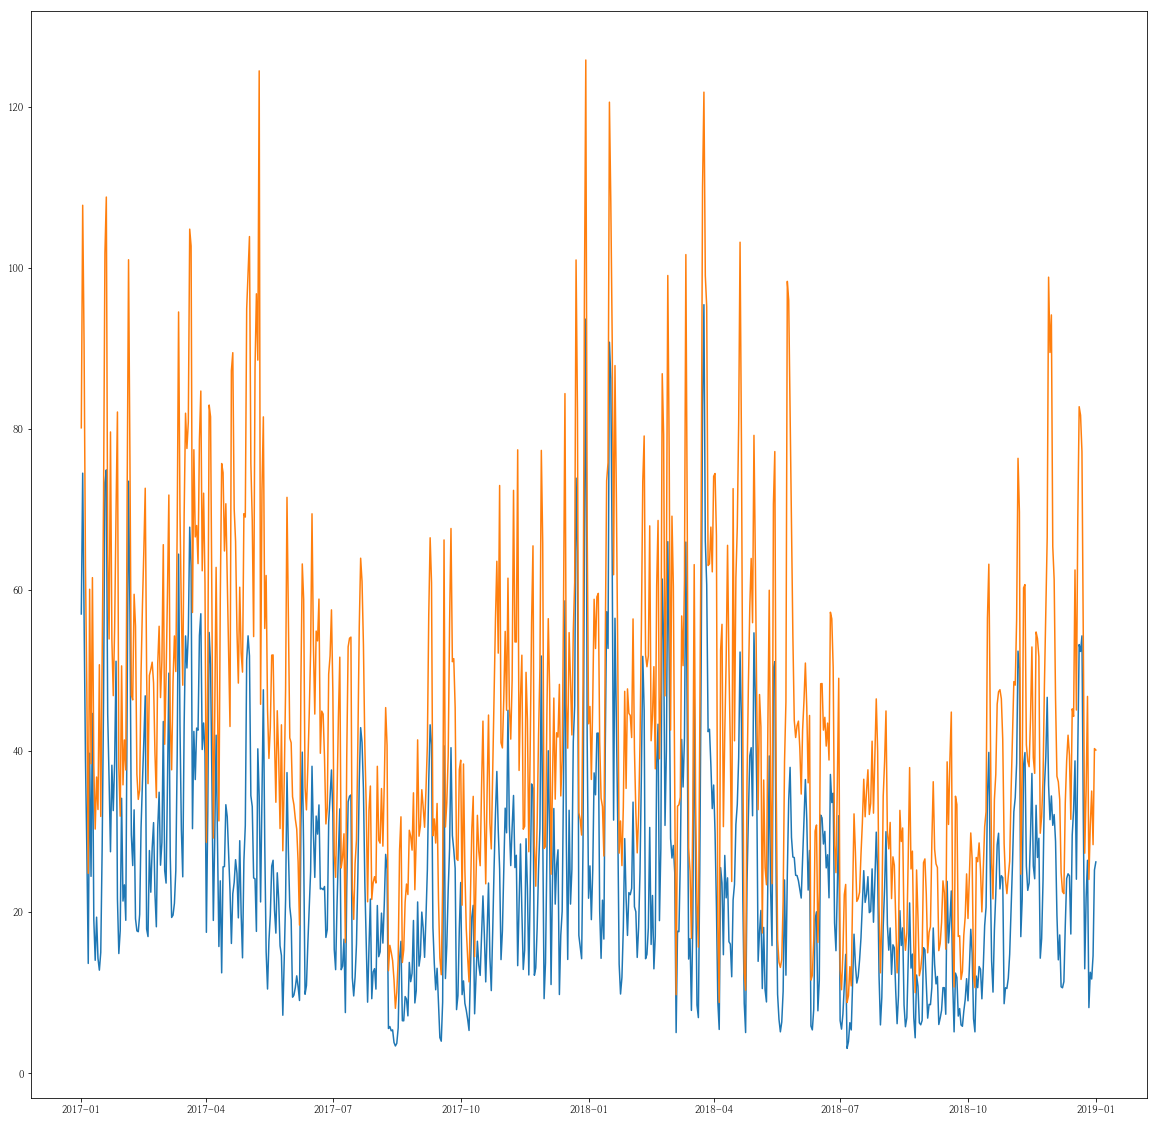

In [64]:
# 공법 Bar Chart

temp = df_dust.groupby("Calendar Day일 2")["PM25", "PM10"].mean()
plt.figure(figsize=(20, 20))

# 공법 Bar Chart
df_count = pd.Series(df.groupby("Calendar Day일 2")["금액"].sum())
plt.plot(pd.to_datetime(temp.index), temp.PM25, pd.to_datetime(temp.index), temp.PM10)

In [65]:
df_merge = pd.read_pickle("/home/pirl/Downloads/merge_F_검색량추가190803_SW.pkl")

In [66]:
df_merge.head()

,모름,KF규격,CUSTOMER NAME,Calendar Day일 2,POS Category Code,UPC,품목명,Sales (Bag),Sales SU,박스입수,...,일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),미세검색량,초미세검색량
0,CNX,0,(주)지에스리테일 본부,2017-01-01,MP,8.800000e+12,CNX 황사마스크 대형1P,27,27.0,50,...,0.419697,0.0,0.0,6.537037,6.541667,8.966102,479.244048,-0.073214,7.0,5.0
1,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,28,0.0,50,...,0.419697,0.0,0.0,6.537037,6.541667,8.966102,479.244048,-0.073214,7.0,5.0
2,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,20,0.0,50,...,0.419697,0.0,0.0,6.537037,6.541667,8.966102,479.244048,-0.073214,7.0,5.0
3,CNX,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,CNX 황사마스크 성인용3P,1,1.0,50,...,0.419697,0.0,0.0,6.537037,6.541667,8.966102,479.244048,-0.073214,7.0,5.0
4,CNX,KF94,(주)지에스리테일 본부,2017-01-01,MP,8.800000e+12,CNX KF94 방역용 마스크 1입,2,2.0,50,...,0.419697,0.0,0.0,6.537037,6.541667,8.966102,479.244048,-0.073214,7.0,5.0


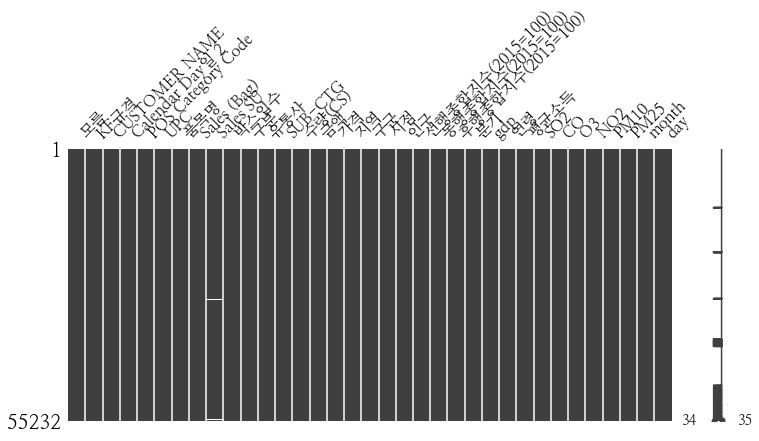

In [67]:
import missingno as msno
msno.matrix(df_test,figsize=(12,5))

In [68]:
df_test.isnull().sum()

모름                     0
KF규격                   0
CUSTOMER NAME          0
Calendar Day일 2        0
POS Category Code      0
UPC                    0
품목명                    0
Sales (Bag)            0
Sales SU             376
박스입수                   0
구분                     0
유통사                    0
SUB-CTG                0
수량(CS)                 0
금액                     0
가격                     0
지역                     0
구군                     0
시점                     0
인구                     0
선행종합지수(2015=100)       0
동행종합지수(2015=100)       0
후행종합지수(2015=100)       0
분기                     0
gdp                    0
연령                     0
평균소득                   0
SO2                    0
CO                     0
O3                     0
NO2                    0
PM10                   0
PM25                   0
month                  0
day                    0
dtype: int64

In [45]:
df.to_pickle("/home/pirl/Downloads/posplex.pkl")

In [69]:
df_raw_obj = df_raw.select_dtypes(exclude="object")
df_raw_obj.head()

,UPC,Sales (Bag),Sales SU,박스입수,수량(CS),금액,가격,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),gdp
0,8.800000e+12,27,27.0,50,0.5,49000,1815,472141,106.8,105.7,105.1,384682.7
1,8.800000e+12,28,0.0,50,0.6,84000,3000,472141,106.8,105.7,105.1,384682.7
2,8.800000e+12,20,0.0,50,0.4,57000,2850,472141,106.8,105.7,105.1,384682.7
3,8.800000e+12,1,1.0,50,0.0,2600,2600,154381,106.8,105.7,105.1,384682.7
4,8.800000e+12,2,2.0,50,0.0,5000,2500,154381,106.8,105.7,105.1,384682.7


In [70]:
df_raw_inf = df_raw.select_dtypes(include="object")
df_raw_inf.head()

,모름,KF규격,CUSTOMER NAME,Calendar Day일 2,POS Category Code,품목명,구분,유통사,SUB-CTG,지역,구군,시점,분기
0,CNX,0,(주)지에스리테일 본부,2017-01-01,MP,CNX 황사마스크 대형1P,POS,(주)지에스리테일 본부,MP,경기,평택시,2017-01,2017Q1
1,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,POS,(주)지에스리테일 본부,MG,경기,평택시,2017-01,2017Q1
2,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,POS,(주)지에스리테일 본부,MG,경기,평택시,2017-01,2017Q1
3,CNX,0,(주)지에스리테일 본부,2017-01-01,MG,CNX 황사마스크 성인용3P,POS,(주)지에스리테일 본부,MG,경기,포천시,2017-01,2017Q1
4,CNX,KF94,(주)지에스리테일 본부,2017-01-01,MP,CNX KF94 방역용 마스크 1입,POS,(주)지에스리테일 본부,MP,경기,포천시,2017-01,2017Q1
